<a href="https://colab.research.google.com/github/alexantaki16/Cancer_with_kaggle/blob/master/Code/breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using a dataset from [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) to predict breast cancer diagnosis

## What will this notebook cover?
This notebook will have EDA peppered in and a Random Forest as well as a KNN model.

## Goal of the project
My main objective is to learn by doing.  I want to expand my skill set and I believe Random Forests and KNN models are two of the classic models to build.


#Data Dictionary

| Column | Meaning |
| ------ | ------- |
| ID | The unique identifier for each person |
| Diagnosis | The diagnosis of breast tissue | 
| Radius_mean | Mean of distances from center to points on the perimeter | 
| Texture_mean | Standard deviation of grey-scale-values | 
| Perimeter_mean | Mean size of the core tumor | 
| Area_mean | The mean of the area | 
| Smoothness_mean | Mean of local variation in radius lengths | 
| Compactness_mean | Mean of perimeter<sup>2</sup> | 
| Concavity_mean | Mean of severity of concavr portions of the contour | 
| Concave points | Mean for number of concave portions of the contour | 
| Concave_points_mean | | 
| Fractal_dimension_mean | | 
| Radius_se | 
| Texture | The texture of the tumor | 
| Perimeter_se | | 
| Area_se | | 
| Smoothness_se | | 
| Compactness_se | | 
| Concavity_se | | 
| Concave points_se | | 
| Symmetry_se | | 
| Fractual_dimensions_se | | 
| Radius_worst | | 
| Texture_worst | | 
| Perimeters_wosrt | | 
| Area_worst | | 
| Smoothness | |
| Compactness_worst | |
| Concavity_worst | |
| Concave points_worst | |
| Symmetry_worst | |
| Fractal_dimension_worst | |
| Unname: 32 | |

#Let's import the libarires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier

"""
Input the google.colab mount drive to use the data
"""

In [ ]:
#Use pandas to take the uploaded file and make it into a useful dataframe
dataset = pd.read_csv("breast_cancer_dataset.csv")

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Let's familize ourself with the data

This is a method I commonly use to find a lot of quick and import information about the dataset I am using. 

The methods I use here are:
`head()`, `info()`, `describe()`, `tail()`, `columns()`, `dtypes()`, `shape()`

In [ ]:
def background_check(dataframe):
  """
    Summary: This function give us a quick look at the key components of our data

    Description: These are pandas functions I use all the time and I figured I may
    as well make it all in one function.  This is typically in a utils file and imported
    in order to be conveinent.

    Paramters: Dataframe

    Return: None
  """
  print("#" * 100)
  print(dataframe.head())

  print("#" * 100)
  print(dataframe.info())

  print("#" * 100)
  print(dataframe.describe)

  print("#" * 100)
  print(dataframe.tail())

  print("#" * 100)
  print(dataframe.columns)

  print("#" * 100)
  print(dataframe.dtypes)

  print("#" * 100)
  print(dataframe.shape)

In [ ]:
#Call the background check
background_check(dataset)

####################################################################################################
         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]
####################################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   textu

> **Note!**: The only categorical column is the diagnosis which we can handle.  Let's check our value counts to see how much we have of each.

> **Note!**: The other value counts do not help as much since there are a lot of different values so I removed them for the sake of keeping this notebook clean

In [ ]:
dataset.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

What can we tell from this?  We can see we have 357 benign and 212 malignant.  This is an imbalance but it is okay for now.

#It is time to visualize this data!

What type of graphs should we make?

How about we use these:
- Correlations (to help see which columns influence the other)
- Count plots (to help visualize the value counts)
- Distplots (to help see the data distribution and see if we have outliers)
- Violin plots (to help see the data distribution in a different light)

There are others we could try: pair plots, bar charts, pie charts, etc., but let's keep it simple!

As Andrej Karpathy said, "Become one with the data."  Let's go

#Correlations and Heatmaps

Why correlations and heatmaps?

Well, a correlation and heatmap are a great way to familiarize ourselves with our data.  We can see based on the color and the numbers what columns have a meaning too us and which do not.

In [ ]:
def correlations(dataframe):
  """
  Summary: This will plot the correlations in a heatmap

  Description: This function will plot the correlations in a heatmap format for us.
  We have about 30 columns so it will be a big graph.  Let's take it step by step

  Parameters:  A dataframe

  Return: None
  """

  #We need to drop the useless Unnamed 32 column
  dataframe = dataframe.drop(["Unnamed: 32"], axis = 1)

  #Create the correlation and the cmap
  corr = dataframe.corr(method = "pearson")
  cmap = sns.diverging_palette(230, 20, as_cmap = True) #Set a nice color pattern for us to see

  #This is our figure we will put the heatmap on
  fig, ax = plt.subplots(figsize = (20, 15))

  #This is the actual heatmap making with the arguments specifically chosen.  There are comments next to each to see what it does
  sns_corr = sns.heatmap(corr,                                   #The data to correlate
                         annot = True,                           #The numbers in the boxes
                         fmt = ".1g",                            #A formating option for the numbers in the boxes
                         vmin = -1,                              #Take a glance at the right and see the bar?  We are adjusting that minimum dark blue value
                         vmax = 1,                               #This is the same as before but the deep red
                         center = 0,                             #This is the central value for the color.  Think of this as neutral
                         cmap = "coolwarm",                      #The color scheme of the heatmap
                         linecolor = "black",                    #The dark line clearly sepearting the value
                         linewidths = 3,                         #The thickness of the black line
                         cbar_kws = {"orientation": "vertical"}) #The bar on the right is set to vertical

  #The column names are very close so make the rotation 90 degress to have them fit.  I am sorry - you have to turn your head to see them all.
  sns_corr.set_xticklabels(sns_corr.get_xticklabels(), rotation = 90)

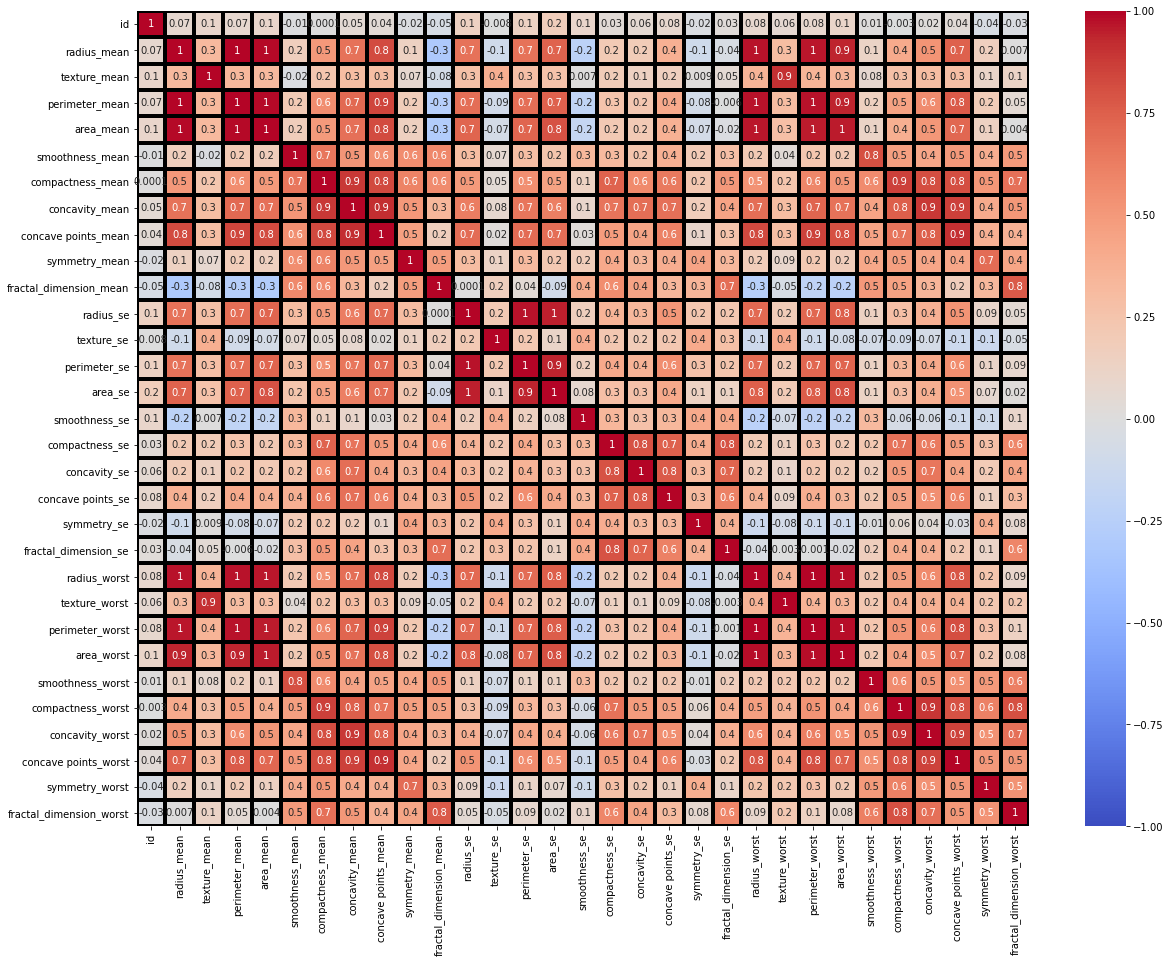

In [ ]:
correlations(dataset)

This is a lot to take in.  We can take our time going through to develop our own intuition about the data.  Let's keep going!

#Countplots

Why countplots

Well, a countplot can show us the value counts method as a graph.  I used the value counts above and I wanted to use this since I learn more with the help of visuals and doing.

In [ ]:
def countplots(dataframe):
  """
  Summary:  This will show us the countplot of the diagnosis

  Description:  This shows us the countplot of only one column but I am trying to
  modularize my code so I put it in its own method

  Parameters: Dataframe

  Return: None
  """
  ax = sns.countplot(x = "diagnosis", data = dataframe)

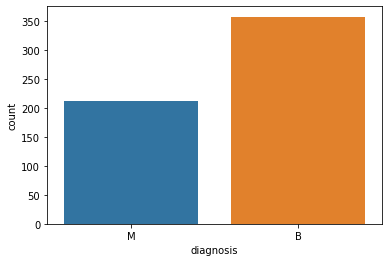

In [ ]:
countplots(dataset)

This can visualize the value counts for us.  We can easily see our class imbalance now

# Distplots

Why distplots?

Distplots can help us see the distribution of the data.  We can easily see what needs to be standardized.

In [ ]:
def distplots(dataframe):
  """
  Summary: This will make a distribution plot for all of the columns

  Description: This will make distribution plots for all of the data.  This will 
  help us see what needs to be standardized and normalized.

  Parameters:  Dataframe

  Return: None
  """
  fig, ax = plt.subplots(nrows = 10, ncols = 3, figsize = (30, 30))

  id_distplot = sns.distplot(dataframe.id, ax = ax[0][0])
  radius_mean_distplot = sns.distplot(dataframe.radius_mean, ax = ax[0][1])
  texture_mean_distplot = sns.distplot(dataframe.texture_mean, ax = ax[0][2])
  perimeter_mean_distplot = sns.distplot(dataframe.perimeter_mean, ax = ax[1][0])
  area_mean_distplot = sns.distplot(dataframe.area_mean, ax = ax [1][1])
  smoothness_mean_distplot = sns.distplot(dataframe.smoothness_mean, ax = ax[1][2])
  compactness_mean_distplot = sns.distplot(dataframe.compactness_mean, ax = ax[2][0])
  concavity_mean_distplot = sns.distplot(dataframe.concavity_mean, ax = ax[2][1])
  concave_points_mean_distplot = sns.distplot(dataframe["concave points_mean"], ax = ax[2][2])
  symmetry_mean_distplot = sns.distplot(dataframe.symmetry_mean, ax = ax[3][0])
  fractal_dimension_mean_distplot = sns.distplot(dataframe.fractal_dimension_mean, ax = ax[3][1])
  radius_se_distplot = sns.distplot(dataframe.radius_se, ax = ax[3][2])
  texture_se_distplot = sns.distplot(dataframe.texture_se, ax = ax[4][0])
  perimeter_se_distplot = sns.distplot(dataframe.perimeter_se, ax = ax[4][1])
  area_se_distplot = sns.distplot(dataframe.area_se, ax = ax[4][2])
  smoothness_se_distplot = sns.distplot(dataframe.smoothness_se, ax = ax[5][0])
  compactness_se_distplot = sns.distplot(dataframe.compactness_se, ax = ax[5][1])
  concavity_se_distplot = sns.distplot(dataframe.concavity_se, ax = ax[5][2])
  concave_points_se_distplot = sns.distplot(dataframe["concave points_se"], ax = ax[6][0])
  symmetry_se_distplot = sns.distplot(dataframe.symmetry_se, ax = ax[6][1])
  fractal_dimensions_se_distplot = sns.distplot(dataframe.fractal_dimension_se, ax = ax[6][2])
  radius_worst_distplot = sns.distplot(dataframe.radius_worst, ax = ax[7][0])
  texture_worst_distplot = sns.distplot(dataframe.texture_worst, ax = ax[7][1])
  perimeter_worst_distplot = sns.distplot(dataframe.perimeter_worst, ax = ax[7][2])
  area_worst_distplot = sns.displot(dataframe.area_worst, ax = ax[7][0])
  smoothness_worst_displot = sns.displot(dataframe.smoothness_worst, ax = ax[7][1])
  compactness_worst_distplot = sns.distplot(dataframe.compactness_worst, ax = ax[7][2])
  concavity_worst_distplot = sns.distplot(dataframe.concavity_worst, ax = ax[8][0])
  concave_points_worst_distplot = sns.distplot(dataframe["concave points_worst"], ax = ax[8][1])
  symmetry_worst_distplot = sns.distplot(dataframe.symmetry_worst, ax = ax[8][2])
  fractal_dimension_worst_distplot = sns.distplot(dataframe.fractal_dimension_worst, ax = ax[9][0])

  plt.show()
  fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

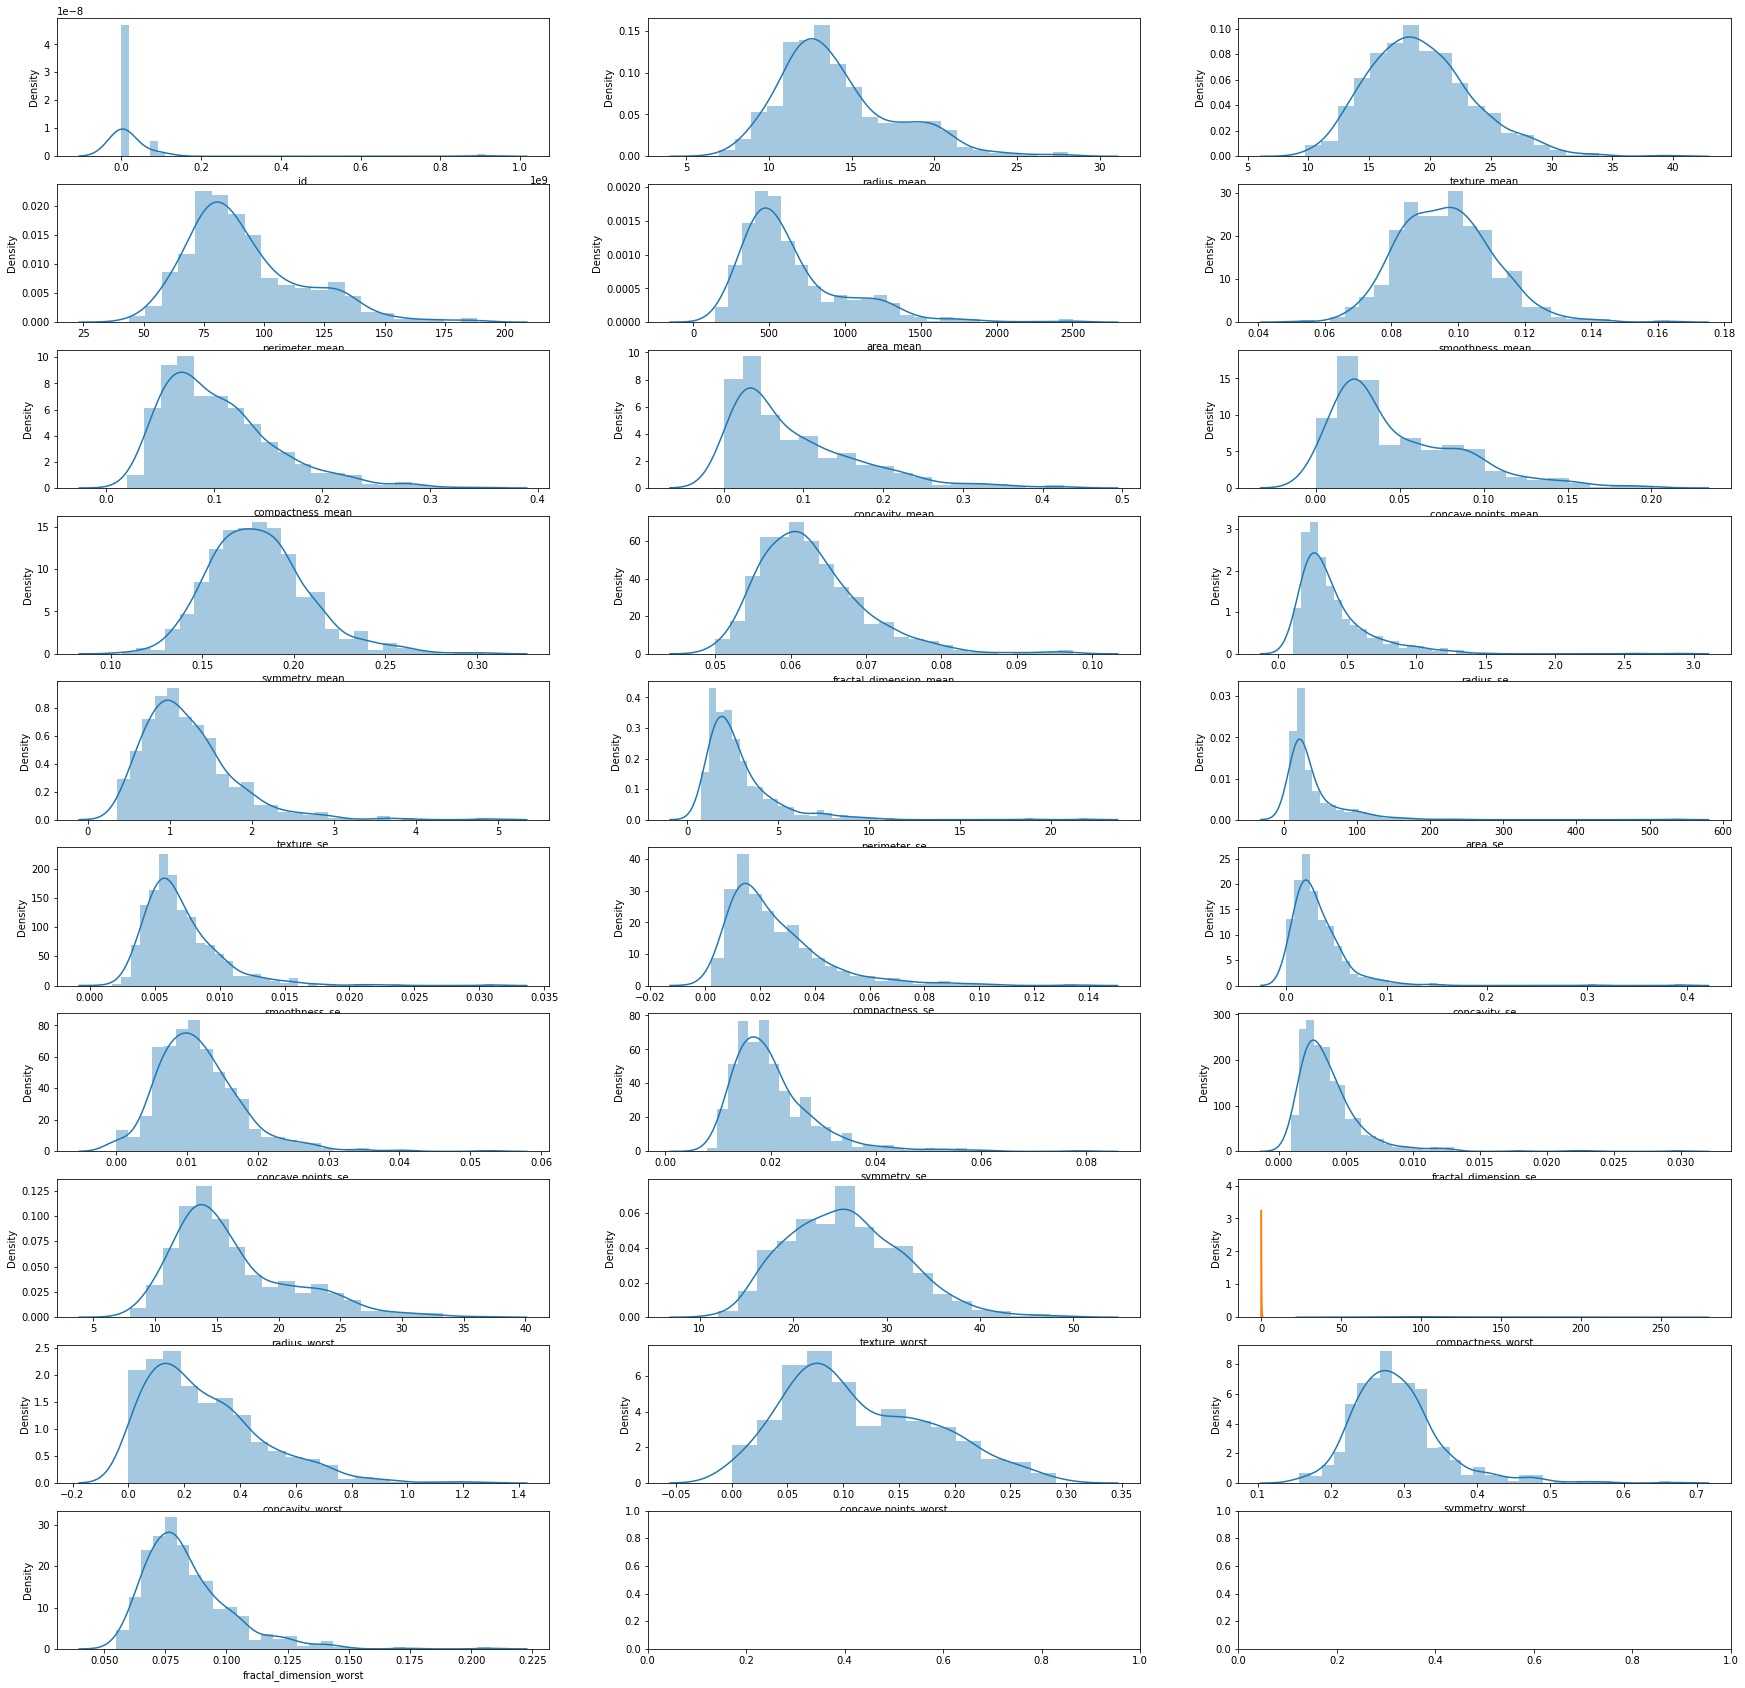

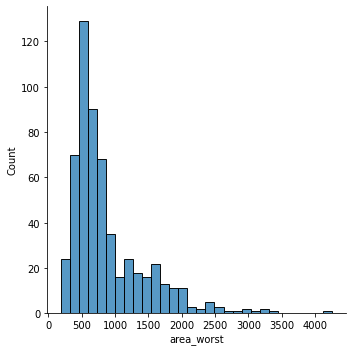

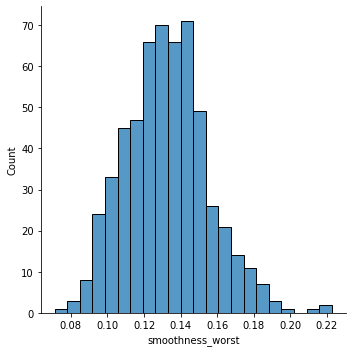

In [ ]:
distplots(dataset)

#What can we see

The distributions give us an idea of what needs to be normalzied and standardized.

I am not sure why these last two are not in the subplots, however, if you know and want to let me know feel free to say it!

#Violin plots

Why violin plots?

Violin plots help us see what a distribution plot can show us but it is even easier to see the distributions (at least I think so).

In [ ]:
def violin_plots(dataframe):
   """
  Summary: This will make violin plots for the data
  
  Description: This will make a bunch of violin plots for the data to help us visualize
  
  Parameters: Dataframe
  
  Return: None
  """
  fig, ax = plt.subplots(nrows = 10, ncols = 3, figsize = (30, 20))

  id_violin = sns.violinplot(x = dataframe.id, y = dataframe["diagnosis"], ax = ax[0][0])
  radius_mean_violin = sns.violinplot(x = dataframe["radius_mean"], y = dataframe["diagnosis"], ax = ax[0][1])
  texture_mean_violin = sns.violinplot(x = dataframe.texture_mean, y = dataframe["diagnosis"], ax = ax[0][2])
  perimeter_mean_violin = sns.violinplot(x = dataframe.perimeter_mean, y = dataframe["diagnosis"], ax = ax[1][0])
  area_mean_violin = sns.violinplot(x = dataframe.area_mean, y = dataframe["diagnosis"], ax = ax [1][1])
  smoothness_mean_violin = sns.violinplot(x = dataframe.smoothness_mean, y = dataframe["diagnosis"], ax = ax[1][2])
  compactness_mean_violin = sns.violinplot(x = dataframe.compactness_mean, y = dataframe["diagnosis"], ax = ax[2][0])
  concavity_mean_violin = sns.violinplot(x = dataframe.concavity_mean, y = dataframe["diagnosis"], ax = ax[2][1])
  concave_points_mean_violin = sns.violinplot(x = dataframe["concave points_mean"], y = dataframe["diagnosis"], ax = ax[2][2])
  symmetry_mean_violin = sns.violinplot(x = dataframe.symmetry_mean, y = dataframe["diagnosis"], ax = ax[3][0])
  fractal_dimension_mean_violin = sns.violinplot(x = dataframe.fractal_dimension_mean, y = dataframe["diagnosis"], ax = ax[3][1])
  radius_se_violin = sns.violinplot(x = dataframe.radius_se, y = dataframe["diagnosis"], ax = ax[3][2])
  texture_se_violin = sns.violinplot(x = dataframe.texture_se, y = dataframe["diagnosis"],  ax = ax[4][0])
  perimeter_se_violin = sns.violinplot(x = dataframe.perimeter_se, y = dataframe["diagnosis"], ax = ax[4][1])
  area_se_violin = sns.violinplot(x = dataframe.area_se, y = dataframe["diagnosis"], ax = ax[4][2])
  smoothness_se_violin = sns.violinplot(x = dataframe.smoothness_se, y = dataframe["diagnosis"], ax = ax[5][0])
  compactness_se_violin = sns.violinplot(x = dataframe.compactness_se, y = dataframe["diagnosis"], ax = ax[5][1])
  concavity_se_violin = sns.violinplot(x = dataframe.concavity_se, y = dataframe["diagnosis"],  ax = ax[5][2])
  concave_points_se_violin = sns.violinplot(x = dataframe["concave points_se"], y = dataframe["diagnosis"], ax = ax[6][0])
  symmetry_se_violin = sns.violinplot(x = dataframe.symmetry_se, y = dataframe["diagnosis"],  ax = ax[6][1])
  fractal_dimensions_se_violin = sns.violinplot(x = dataframe.fractal_dimension_se, y = dataframe["diagnosis"], ax = ax[6][2])
  radius_worst_violin = sns.violinplot(x = dataframe.radius_worst, y = dataframe["diagnosis"], ax = ax[7][0])
  texture_worst_violin = sns.violinplot(x = dataframe.texture_worst, y = dataframe["diagnosis"], ax = ax[7][1])
  perimeter_worst_violin = sns.violinplot(x = dataframe.perimeter_worst, y = dataframe["diagnosis"], ax = ax[7][2])
  area_worst_violin = sns.violinplot(x = dataframe.area_worst, y = dataframe["diagnosis"], ax = ax[7][0])
  smoothness_worst_violin = sns.violinplot(x = dataframe.smoothness_worst, y = dataframe["diagnosis"],  ax = ax[7][1])
  concavity_worst_viloin = sns.violinplot(x = dataframe.concavity_worst, y = dataframe["diagnosis"], ax = ax[8][0])
  concave_points_worst_violin = sns.violinplot(x = dataframe["concave points_worst"], y = dataframe["diagnosis"], ax = ax[8][1])
  symmetry_worst_violin = sns.violinplot(x = dataframe.symmetry_worst, y = dataframe["diagnosis"],  ax = ax[8][2])
  fractal_dimension_worst_violin = sns.violinplot(x = dataframe.fractal_dimension_worst, y = dataframe["diagnosis"], ax = ax[9][0])

  fig.tight_layout()
  plt.show()

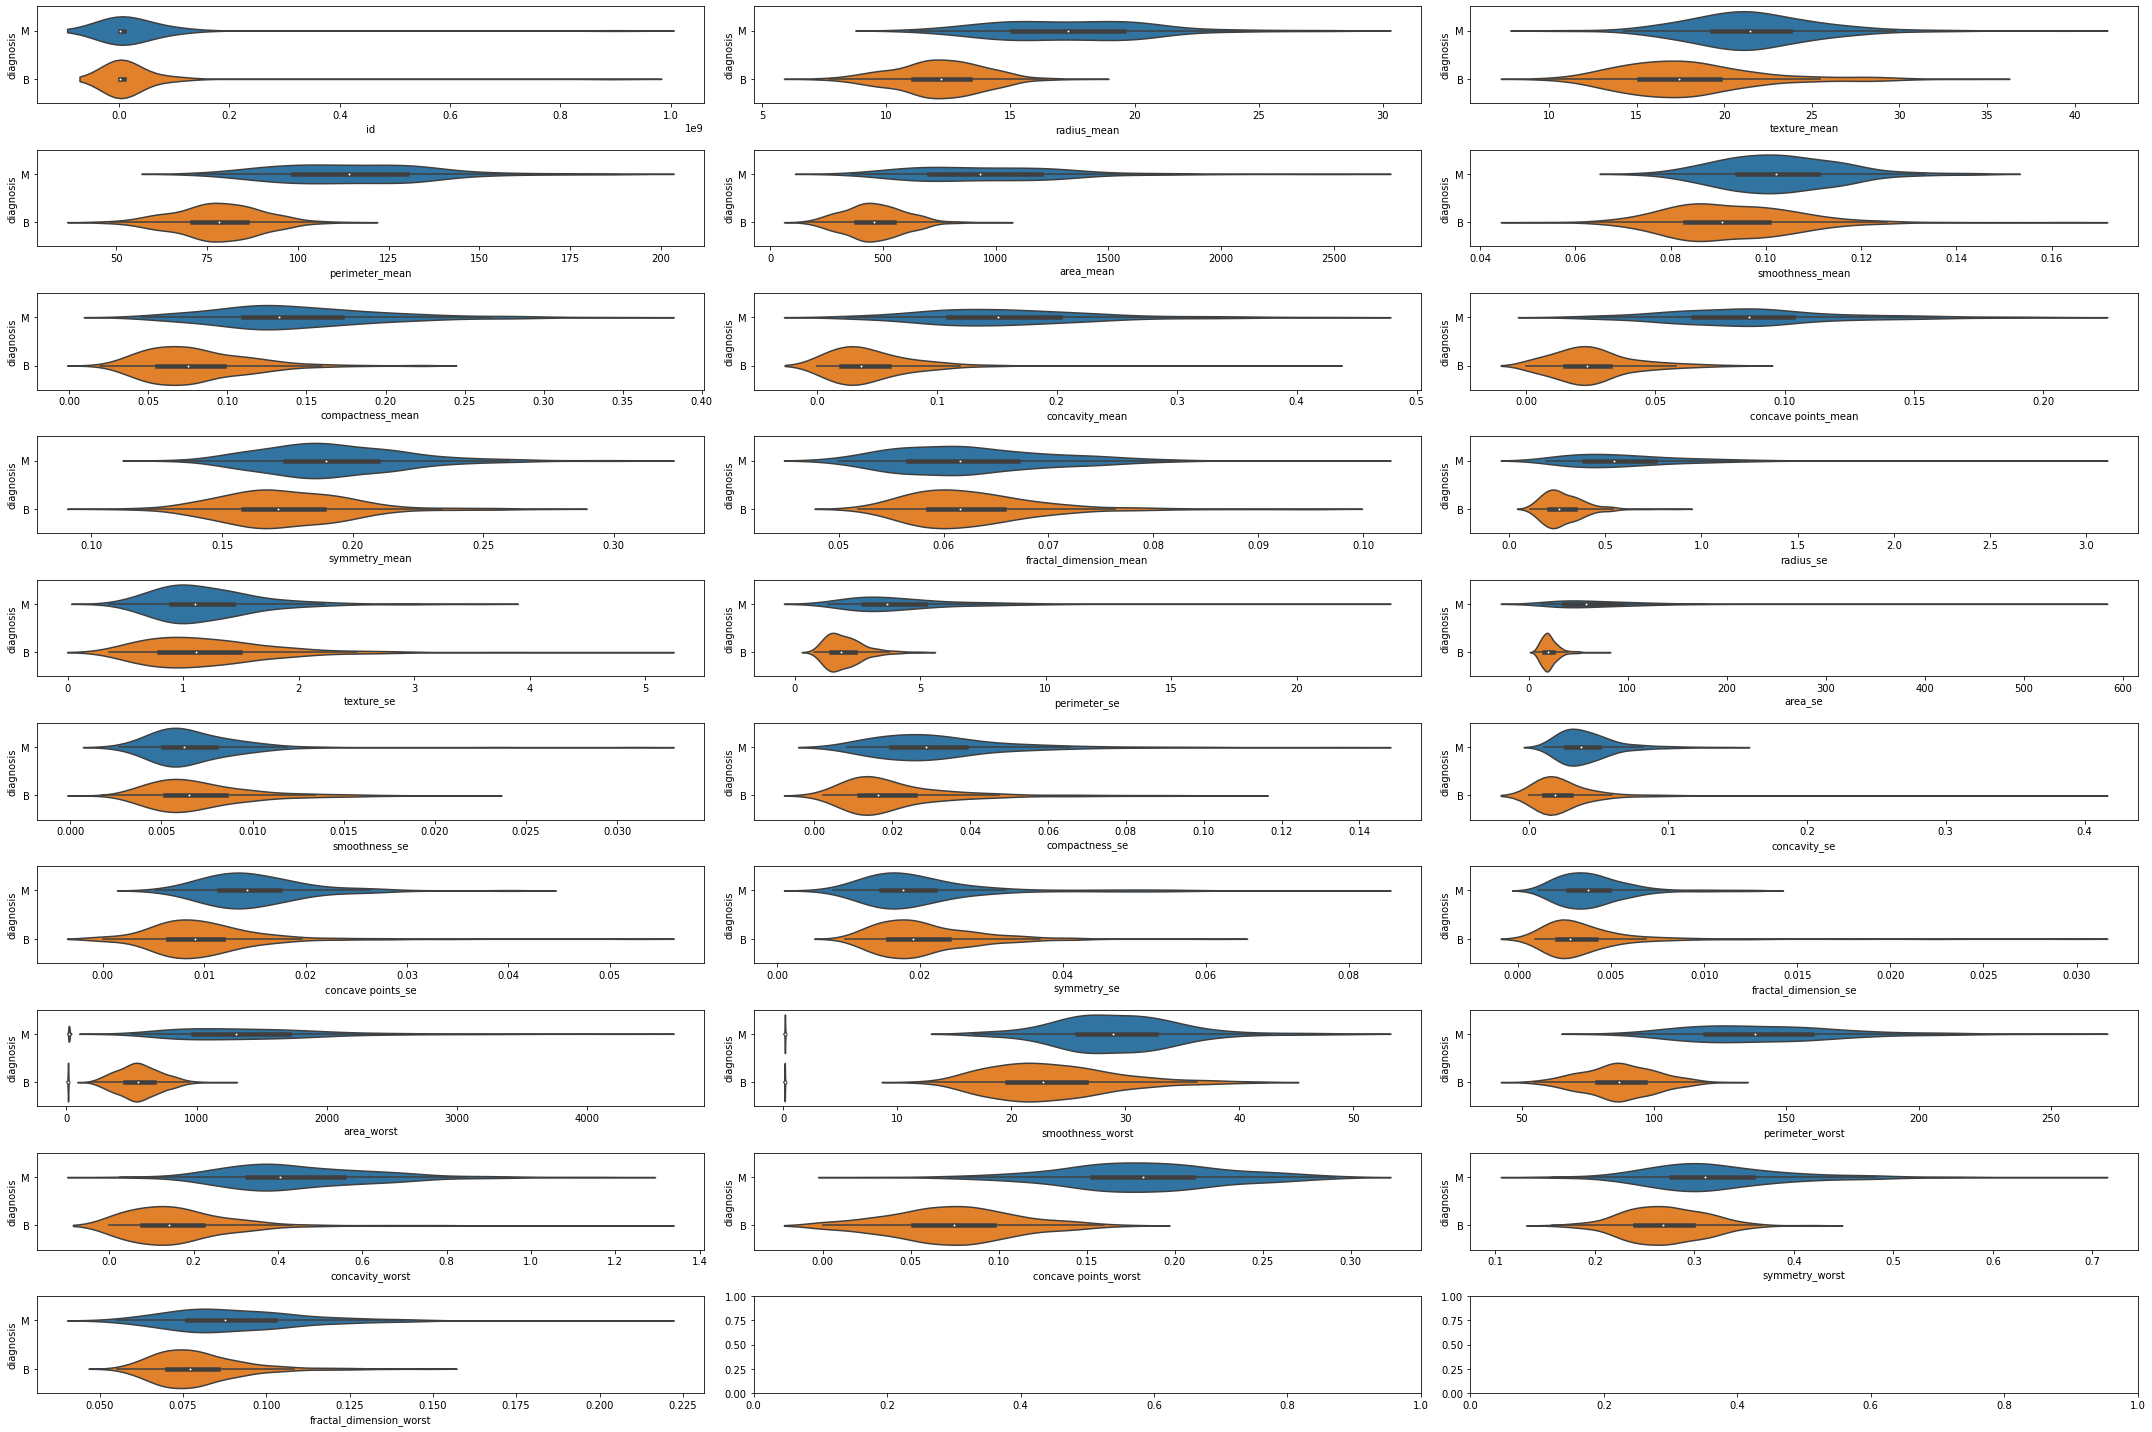

In [ ]:
violin_plots(dataset)

#Models!

Let's split the data then try a random forest and a clustering algorithm

In [ ]:
#Split the data
X = dataset.drop(["Unnamed: 32", "diagnosis"], axis = 1)
y = pd.get_dummies(dataset["diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Random forest with no normalization

Let's see how it does with no normalization and then we can experiment.

In [ ]:
def random_forest_model():
  """
  Summary: This will create the random forest

  Description: This will create, fit, and evaluate the random forest.  We also print a
  classification report to see the precision, recall, f1-score, and support

  Parameters: None

  Return: None
  """
  try:
    random_forest = RandomForestClassifier()
    
    random_forest.fit(X_train, y_train)
    
    random_forest_preds = random_forest.predict(X_test)
    
    print("Accuracy is: ", accuracy_score(y_test, random_forest_preds) * 100)
    print(classification_report(y_test, random_forest_preds))
  except: AttributeError

In [ ]:
random_forest_model()

Accuracy is:  98.24561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.97      0.97      0.97        36

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114
 samples avg       0.98      0.98      0.98       114



#KNN with no normalization

Let's see how this does with no normalization and then we can experiment

In [ ]:
def knn():
  """
  Summary: This is the K Nearest Neighbor's example

  Description: This is the creation, fitting, and evaluating of the KNN model

  Parameters: None

  Return: None
  """
  neighbors = KNeighborsClassifier(n_neighbors=3)
  neighbors.fit(X_train, y_train)
  neighbors_preds = neighbors.predict(X_test)

  print("Accuracy is: ", accuracy_score(y_test, neighbors_preds) * 100)
  print(classification_report(y_test, neighbors_preds))

In [ ]:
knn()

Accuracy is:  78.0701754385965
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        78
           1       0.70      0.53      0.60        36

   micro avg       0.78      0.78      0.78       114
   macro avg       0.75      0.71      0.73       114
weighted avg       0.77      0.78      0.77       114
 samples avg       0.78      0.78      0.78       114



#What can we see from this?

The random forest is the winner.  I used all defaults too and it is in the high 90s.  It is not even normalized.  The RF is the clear winner to the clustering algorithm.

What can we do differnetly?  Well we can noramlize the data as a start...  We can also try a different algorithm: Logistic regression, SVM, etc.  We can mess with the hyperparameters of the models: more estimators of clustes, depth of the tree, etc

I am going to put this on my GitHub() with a README.md if you wish to view this on GitHub feel free to check it out